In [1]:
import sympy

sympy.init_printing()

### Quadratic Action when dg = 0

In this case, q = delta_Phi.

In [2]:
syms = sympy.symbols("r psi theta phi")
r, psi, theta, phi = syms

In [3]:
L = sympy.symbols("L")  # AdS length scale
r_0 = sympy.symbols("r_0")

In [4]:
# spherical part of the metric
g = sympy.Function('g')(r)
dg = sympy.diff(g, r)
ddg = sympy.diff(dg, r)

In [5]:
# radial part of the metric
f = sympy.Function('f')(r)
df = sympy.diff(f, r)

In [6]:
# gauge field
Phi = sympy.Function('Phi')(r)
dPhi = sympy.diff(Phi, r)

The Lagrangian is given by the following.

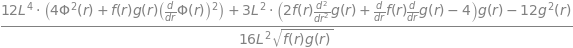

In [7]:
lagrangian = 3 * (4 * L ** 4 * (4 * Phi ** 2 + f * g * dPhi ** 2) + L ** 2 * g * (2 * f * ddg + df * dg - 4) - 4 * g ** 2) / (16 * L ** 2 * sympy.sqrt(f * g))
lagrangian

The expansion of the action involving df consists of the following terms.

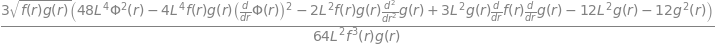

In [8]:
ddS_ff = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), f))
ddS_ff

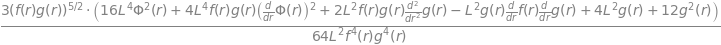

In [9]:
ddS_fg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), g))
ddS_fg

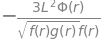

In [10]:
ddS_fphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), Phi))
ddS_fphi

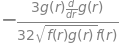

In [11]:
ddS_fdf = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), df))
ddS_fdf

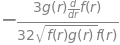

In [12]:
ddS_fdg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), dg))
ddS_fdg

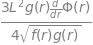

In [13]:
ddS_fdphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), dPhi))
ddS_fdphi

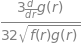

In [14]:
ddS_dfg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, df), g))
ddS_dfg

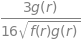

In [15]:
ddS_dfdg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, df), dg))
ddS_dfdg

In [16]:
delta_f = sympy.Function('delta_f')(r)
ddelta_f = sympy.diff(delta_f, r)

In [17]:
delta_g = sympy.Function('delta_g')(r)
ddelta_g = sympy.diff(delta_g, r)

In [18]:
delta_Phi = sympy.Function('delta_Phi')(r)
ddelta_Phi = sympy.diff(delta_Phi, r)

Use integration by parts on the f, df term:

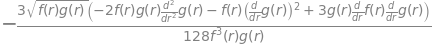

In [19]:
ddS_ff_2 = -sympy.simplify(sympy.diff(ddS_fdf, r)) / 2
ddS_ff_2

In [20]:
action = (
    delta_f ** 2 * (sympy.simplify(ddS_ff / 2 + ddS_ff_2)) +
    delta_f * delta_g * ddS_fg +
    delta_f * delta_Phi * ddS_fphi +
    delta_f * ddelta_g * ddS_fdg +
    delta_f * ddelta_Phi * ddS_fdphi +
    ddelta_f * delta_g * ddS_dfg +
    ddelta_f * ddelta_g * ddS_dfdg
)

Set delta_g and its derivative to zero.

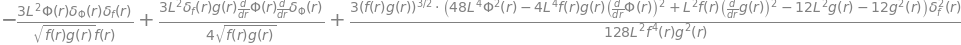

In [21]:
action = action.subs({delta_g: 0, ddelta_g: 0})
action

Check the sign of the quadratic factor.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import ellipkinc

In [23]:
def a_b_params(phi_star):
    """Get elliptic integral parameters."""
    a = (1 + 16 * phi_star ** 2) ** (1./4)
    b = np.sqrt((a ** 2 - 1) / 2)
    return a, b

In [24]:
def phi_of_r(r_val, phi_star, L_val):
    """Get gauge field."""
    a, b = a_b_params(phi_star)
    phi = np.arctan(r_val / (L_val * a))
    m = 1 - a ** 2 / b ** 2
    return phi_star * np.cosh((2 / b) * ellipkinc(phi, m))

In [25]:
def dphi_of_r(r_val, phi_star, L_val):
    """Get radial derivative of gauge field."""
    a, b = a_b_params(phi_star)
    phi = np.arctan(r_val / (L_val * a))
    m = 1 - a ** 2 / b ** 2
    denom = np.sqrt((L_val * a * b) ** 2 + (a ** 2 + b ** 2) * r_val ** 2 + r_val ** 4 / L_val ** 2)
    return phi_star * np.sinh((2 / b) * ellipkinc(phi, m)) * 2 / denom

In [26]:
def f_of_r(r_val, L_val, r_0_val):
    return (L_val ** 2 + r_val ** 2 + 2 * r_0_val ** 2) / L_val ** 2

def g_of_r(r_val, r_0_val):
    return r_val ** 2 + r_0_val ** 2

def dg_of_r(r_val):
    return 2 * r_val

In [27]:
def ddf_factor(r_val, phi_star, L_val, r_0_val):
    phi_val = phi_of_r(r_val, phi_star, L_val)
    dphi_val = dphi_of_r(r_val, phi_star, L_val)
    f_val = f_of_r(r_val, L_val, r_0_val)
    g_val = g_of_r(r_val, r_0_val)
    dg_val = dg_of_r(r_val)

    return (
        48 * L_val ** 4 * phi_val ** 2 -
        4 * L_val ** 4 * f_val * g_val * dphi_val ** 2 +
        L_val ** 2 * f_val * dg_val ** 2 -
        12 * L_val ** 2 * g_val -
        12 * g_val ** 2
    )

In [28]:
L_val = 1
r_0_val = 2  # has to be greater than 1.25 * L
phi_star = 5  # has to be greater than 3.56

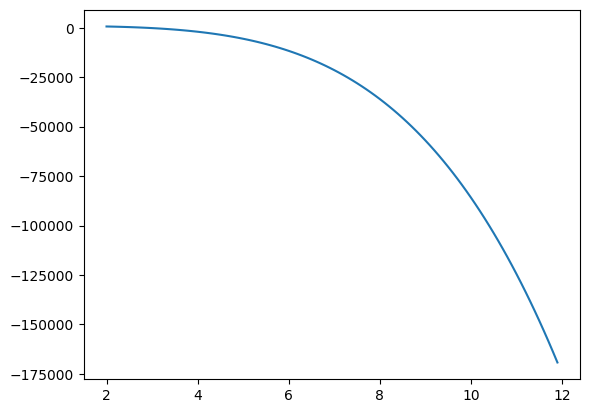

In [29]:
r_vals = np.arange(r_0_val, r_0_val + 10, 0.1)
dfs = [ddf_factor(r_val, phi_star, L_val, r_0_val) for r_val in r_vals]
plt.plot(r_vals, dfs);

It doesn't have to be negative, but in general, it is.

#### Completing the Square

The goal is to write

A * delta_f^2 + B * delta_f * delta_Phi + C * delta_f * ddelta_Phi

in the form

-(a_1 * delta_f + a_2 * delta_Phi + a_3 * ddelta_Phi)^2 + c_0

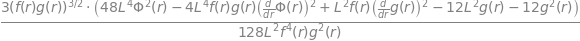

In [30]:
A = sympy.simplify(ddS_ff / 2 + ddS_ff_2)
A

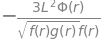

In [31]:
B = ddS_fphi
B

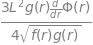

In [32]:
C = ddS_fdphi
C

The solution is:

In [33]:
a_1 = sympy.sqrt(-A)
a_2 = -B / (2 * a_1)
a_3 = -C / (2 * a_1)
c_0 = -B ** 2 * delta_Phi ** 2 / (4 * A) - B * C * delta_Phi * ddelta_Phi / (2 * A) - C ** 2 * ddelta_Phi ** 2 / (4 * A)

In [34]:
completed_square = -(a_1 * delta_f + a_2 * delta_Phi + a_3 * ddelta_Phi) ** 2 + c_0

Check the solution.

In [35]:
r_val = 6

In [36]:
func_subs = {
    L: L_val,
    f: f_of_r(r_val, L_val, r_0_val),
    g: g_of_r(r_val, r_0_val),
    dg: dg_of_r(r_val),
    Phi: phi_of_r(r_val, phi_star, L_val),
    dPhi: dphi_of_r(r_val, phi_star, L_val),
}

In [37]:
action.subs(func_subs)

In [38]:
sympy.simplify(completed_square.subs(func_subs))

There is indeed agreement. The extra terms to add to the Lagrangian are:

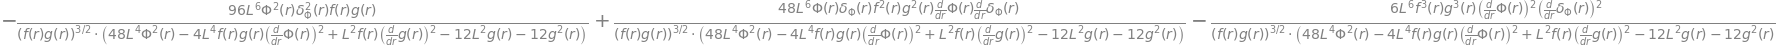

In [39]:
c_0